In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/PC-PHONE/Documents/python/kaggle-Competition/test.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              10 non-null     int64 
 1   body                10 non-null     object
 2   rule                10 non-null     object
 3   subreddit           10 non-null     object
 4   positive_example_1  10 non-null     object
 5   positive_example_2  10 non-null     object
 6   negative_example_1  10 non-null     object
 7   negative_example_2  10 non-null     object
dtypes: int64(1), object(7)
memory usage: 772.0+ bytes


In [4]:
#Checks for missing values in each column
df.isnull().sum()

row_id                0
body                  0
rule                  0
subreddit             0
positive_example_1    0
positive_example_2    0
negative_example_1    0
negative_example_2    0
dtype: int64

In [5]:
df.head(3)

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2
0,2029,NEW RAP GROUP 17. CHECK US OUT https://soundcl...,"No Advertising: Spam, referral links, unsolici...",hiphopheads,"Hey, guys, just wanted to drop in and invite y...",Cum Swallowing Hottie Katrina Kaif Cartoon Xvi...,SD Stream Eng - [Chelsea TV USA](http://soccer...,HD Streams: |[ENG HD Stoke vs Manchester Unite...
1,2030,Make your life comfortable. Get up to 15% Disc...,No legal advice: Do not offer or request legal...,AskReddit,Get a lawyer and get the security camera foota...,That isn't drastic. You tried reaching out to ...,So what are you going to do with the insurance...,It's just for Austria & Germany. If you still ...
2,2031,Kickin' ass and selling underwear!\nJust made ...,"No Advertising: Spam, referral links, unsolici...",gonewild,Good story my friend. Check out my blog at ht...,If you know what exactly you need then you don...,CENTIPEDES\n\nSOME BASED PATRIOTS HAVE CREATED...,[So great! Thanks for sharing.](http://www.che...



**check if the dataset is balanced or not: Checking balance tells you whether you can trust accuracy,and whether you need special handling of minority classes to build a useful moderation model.**


In [6]:
print(df['rule_violation'].value_counts())
print(df['rule_violation'].value_counts(normalize=True) * 100)  # pourcentage: to get percentage use normalize=True

df['rule_violation'].value_counts().sort_index().plot(kind='bar') # bar plot sort_index is used to sort x axis 0 then 1 
plt.xticks([0, 1], ['No Violation (0)', 'Violation (1)'], rotation=0)
plt.ylabel("Count")
plt.title("Distribution of Rule Violations")
plt.show()

KeyError: 'rule_violation'

**EDA (Exploratory Data Analysis)**

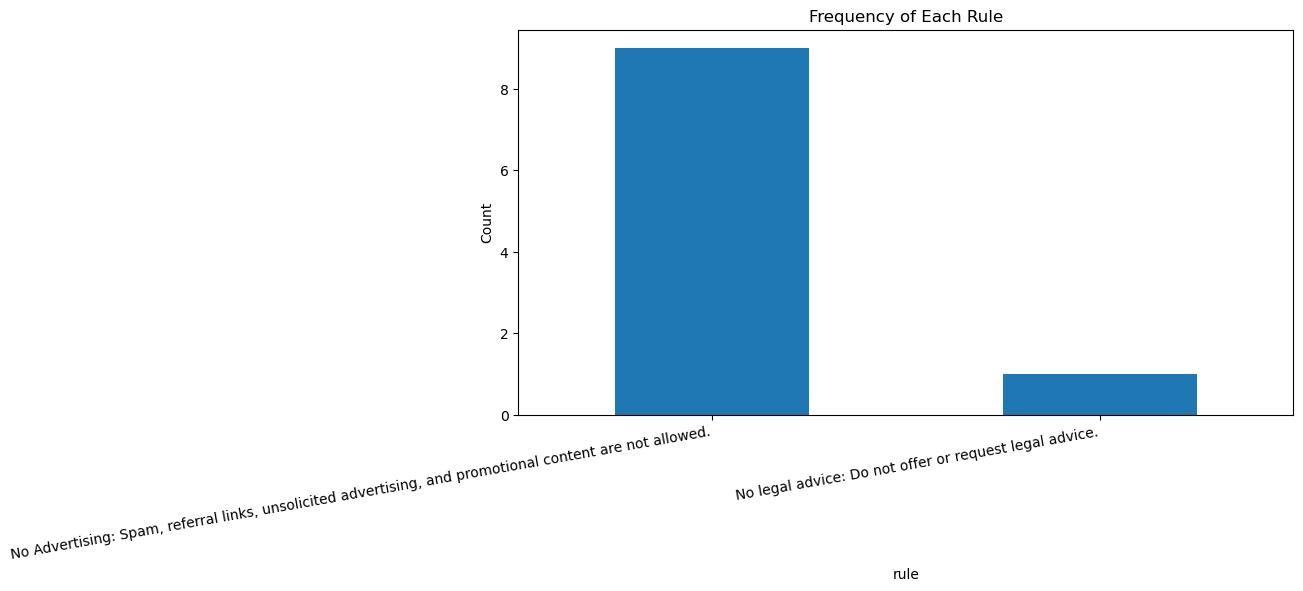

rule
No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.    9
No legal advice: Do not offer or request legal advice.                                                     1
Name: count, dtype: int64


KeyError: 'Column not found: rule_violation'

In [7]:
rule_counts = df['rule'].value_counts() # Count frequency of each rule
plt.figure(figsize=(10,5))
rule_counts.plot(kind='bar') # Bar plot of rule frequencies
plt.xticks(rotation=10, ha='right')
plt.title("Frequency of Each Rule")
plt.ylabel("Count")
plt.show()

print(rule_counts)

rule_violation_rate = df.groupby('rule')['rule_violation'].mean().sort_values(ascending=True) # Mean violation rate per rule there are 2rules
print(rule_violation_rate)


9


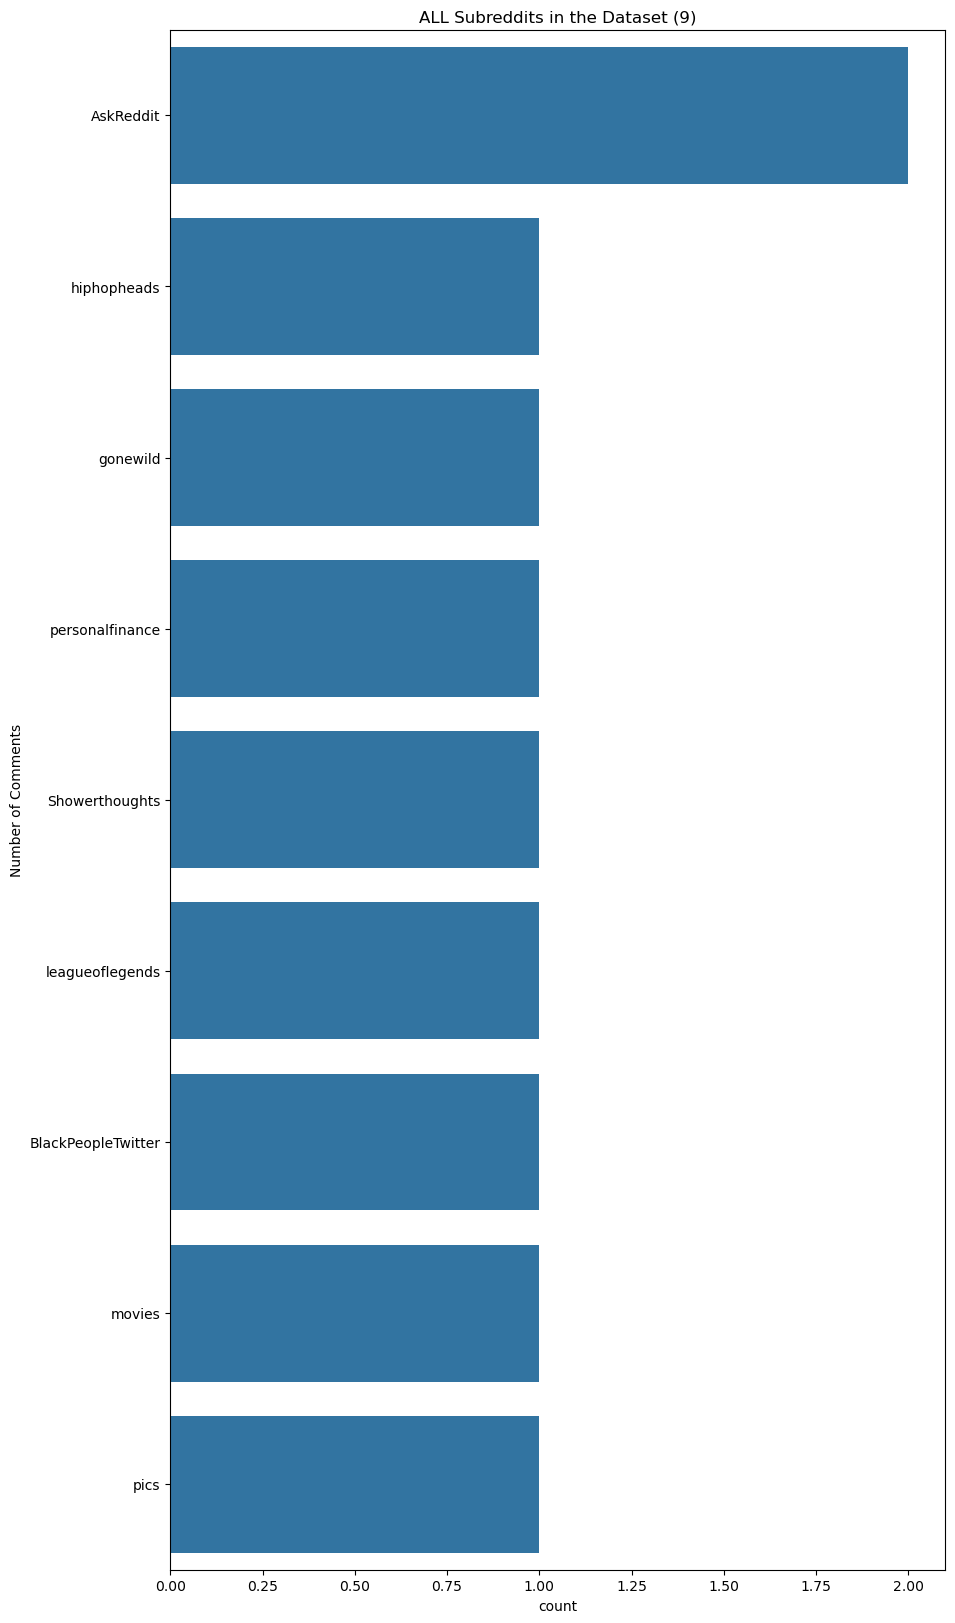

Index(['AskReddit', 'hiphopheads', 'gonewild', 'personalfinance',
       'Showerthoughts', 'leagueoflegends', 'BlackPeopleTwitter', 'movies',
       'pics'],
      dtype='object', name='subreddit')


In [8]:
subs = df['subreddit'].value_counts()
print(len(subs))
subs = df['subreddit'].value_counts().index
plt.figure(figsize=(10,20))

sns.countplot(y='subreddit', data=df[df['subreddit'].isin(subs)],
              order=subs)
plt.title(f"ALL Subreddits in the Dataset ({len(subs)})")
plt.ylabel("Number of Comments")
plt.show()
print(subs)

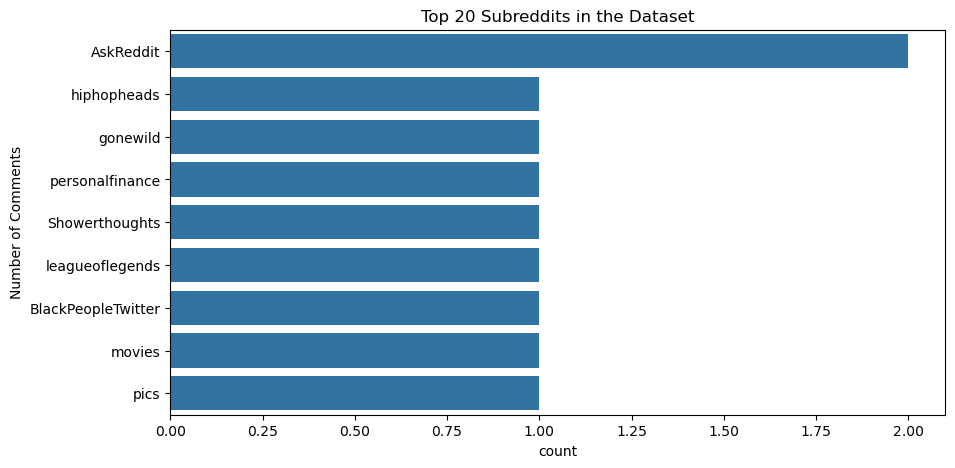

Index(['AskReddit', 'hiphopheads', 'gonewild', 'personalfinance',
       'Showerthoughts', 'leagueoflegends', 'BlackPeopleTwitter', 'movies',
       'pics'],
      dtype='object', name='subreddit')


In [9]:
top_subs = df['subreddit'].value_counts().head(20)
top_subs = df['subreddit'].value_counts().nlargest(20).index # .nlargest is another way to get top n values and .index to get their names
plt.figure(figsize=(10,5))
#top_subs.plot(kind='bar')
sns.countplot(y='subreddit', # horizontal bar plot
              data=df[df['subreddit'].isin(top_subs)], # filter data to include only top subreddits
              order=top_subs) 
plt.title("Top 20 Subreddits in the Dataset")
plt.ylabel("Number of Comments")
plt.show()
print(top_subs)

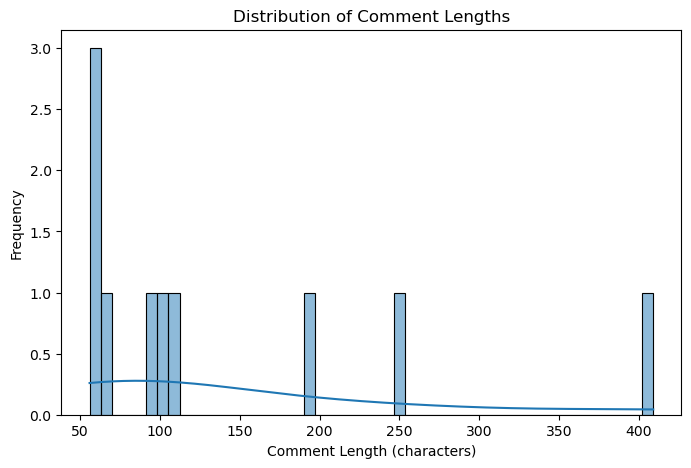


 Average comment length: 140.9
Median comment length: 97.0
Max comment length: 409
Min comment length: 56


In [10]:
df['body_length'] = df['body'].apply(lambda x: len(str(x))) # Calculate length of each comment
plt.figure(figsize=(8,5))
sns.histplot(df['body_length'], bins=50, kde=True)  # kde is used to draw a smooth curve over the histogram
plt.title("Distribution of Comment Lengths")
plt.xlabel("Comment Length (characters)")
plt.ylabel("Frequency")
plt.show()


print("\n Average comment length:", df['body_length'].mean())
print("Median comment length:", df['body_length'].median()) #the middle number in a sorted list of numbers 
print("Max comment length:", df['body_length'].max())
print("Min comment length:", df['body_length'].min())


# Box plot to compare comment lengths for violation vs no violation
The box: 	Contains the middle 50% of data (between 25th and 75th percentiles)
The line inside the box:	Median comment length 
The “whiskers”:      Extend to show the range of most of the data
The points outside whiskers	Outliers:    unusually short or long comments

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='rule_violation', y='body_length', data=df)  
plt.xticks([0, 1], ['No Violation (0)', 'Violation (1)'])
plt.title("Comment Length vs Rule Violation")
plt.show()

ValueError: Could not interpret value `rule_violation` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [83]:
print(df.groupby('rule_violation')['body_length'].describe())

                 count        mean         std   min   25%    50%    75%  \
rule_violation                                                             
0                998.0  157.588176  101.008504  51.0  85.0  119.0  202.0   
1               1031.0  195.481086  121.806840  51.0  91.0  160.0  271.0   

                  max  
rule_violation         
0               487.0  
1               499.0  


In [84]:
# Count how many comments lie outside the boxplot "whiskers" (IQR rule) per group.
def outlier_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

In [85]:
outlier_counts = []  # List to store outlier counts for each rule_violation group reinitialized to empty when it called to avoid accumulation across multiple runs

for name, group in df.groupby('rule_violation'):
    lower, upper = outlier_bounds(group['body_length'])
    n_upper_outliers = (group['body_length'] > upper).sum()
    n_lower_outliers = (group['body_length'] < lower).sum()
    outlier_counts.append({
        'rule_violation': name,
        'n_upper_outliers': n_upper_outliers,
        'n_lower_outliers': n_lower_outliers,
        'upper_whisker': upper,
        'lower_whisker': lower
    })

outlier_df = pd.DataFrame(outlier_counts)
print(outlier_df)




   rule_violation  n_upper_outliers  n_lower_outliers  upper_whisker  \
0               0                59                 0          377.5   
1               1                 0                 0          541.0   

   lower_whisker  
0          -90.5  
1         -179.0  


In [86]:
duplicate_count = df.duplicated(subset=['body']).sum()
print(f"\nDuplicated comment bodies: {duplicate_count}")


Duplicated comment bodies: 160


In [13]:
df['word_count'] = df['body'].apply(lambda x: len(str(x).split()))
print("\nAverage words per comment:", df['word_count'].mean().round(5))

# plt.figure(figsize=(6,4))
# sns.boxplot(x='rule_violation', y='word_count', data=df, palette="Set2", legend=False)
# plt.title("Word Count vs Rule Violation")
# plt.show()


# print(df.groupby('rule_violation')['word_count'].describe())


Average words per comment: 16.6


In [88]:
outlier_counts = []  # List to store outlier counts for each rule_violation group reinitialized to empty when it called to avoid accumulation across multiple runs

for name, group in df.groupby('rule_violation'):
    lower, upper = outlier_bounds(group['word_count'])
    n_upper_outliers = (group['word_count'] > upper).sum()
    n_lower_outliers = (group['word_count'] < lower).sum()
    outlier_counts.append({
        'rule_violation': name,
        'n_upper_outliers': n_upper_outliers,
        'n_lower_outliers': n_lower_outliers,
        'upper_whisker': upper,
        'lower_whisker': lower
    })

outlier_df = pd.DataFrame(outlier_counts)
print(outlier_df)


   rule_violation  n_upper_outliers  n_lower_outliers  upper_whisker  \
0               0                53                 0           62.5   
1               1                 1                 0           96.5   

   lower_whisker  
0          -21.5  
1          -35.5  


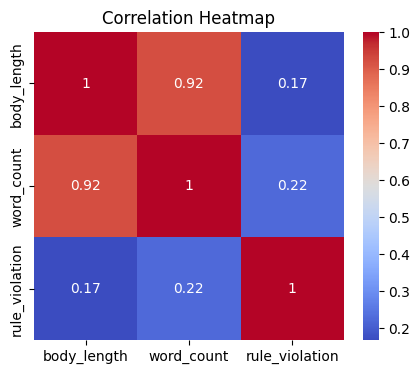

In [89]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['body_length', 'word_count', 'rule_violation']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [14]:
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import re

In [15]:
import string
import nltk
from nltk.corpus import stopwords
# Download stopwords from Natural Language Toolkit it has most common stopwords like the, is, in, and, to etc which do not add much meaning to text
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\PC-
[nltk_data]     PHONE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def clean_text(text):
    text = str(text).lower()                    # lowercase
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)        # remove punctuation/numbers
    text = " ".join([w for w in text.split() if w not in stop_words])  # remove stopwords
    return text

df['clean_body'] = df['body'].apply(clean_text)


It provides a convenient way to tally the occurrences of elements without needing to manually implement counting logic using loops and dictionaries.
 my_list = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']
        fruit_counts = Counter(my_list)
        print(fruit_counts)
        # Output: Counter({'apple': 3, 'banana': 2, 'orange': 1})


Counter returns a  dictionary  ; functions like most_common or element returns a list

In [93]:
violation_texts = " ".join(df[df['rule_violation'] == 1]['clean_body'])
non_violation_texts = " ".join(df[df['rule_violation'] == 0]['clean_body'])

# Count word frequencies
violation_words = Counter(violation_texts.split()).most_common(50) 
non_violation_words = Counter(non_violation_texts.split()).most_common(50)

print("Top words in violations:\n", violation_words)
print("\nTop words in non-violations:\n", non_violation_words)

Top words in violations:
 [('get', 205), ('dont', 136), ('free', 108), ('would', 104), ('im', 86), ('legal', 84), ('like', 81), ('go', 77), ('sex', 76), ('could', 73), ('one', 69), ('want', 68), ('law', 65), ('youre', 63), ('know', 62), ('even', 59), ('people', 59), ('police', 58), ('illegal', 58), ('need', 58), ('money', 53), ('right', 51), ('thats', 50), ('time', 48), ('take', 48), ('make', 48), ('way', 47), ('see', 47), ('lawyer', 47), ('cant', 47), ('call', 47), ('tell', 46), ('think', 46), ('also', 45), ('someone', 45), ('best', 45), ('find', 44), ('rape', 42), ('good', 42), ('pay', 41), ('help', 41), ('sue', 40), ('well', 40), ('case', 39), ('first', 39), ('use', 38), ('give', 38), ('girl', 38), ('going', 37), ('child', 37)]

Top words in non-violations:
 [('stream', 166), ('hd', 144), ('get', 80), ('sd', 79), ('mobile', 79), ('english', 79), ('would', 76), ('watch', 73), ('like', 67), ('check', 60), ('dont', 59), ('yes', 59), ('want', 53), ('free', 49), ('one', 49), ('thats', 48

C:\Users\PC-PHONE\AppData\Local\Temp\ipykernel_13576\3949984700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in violation_words], y=[word for word, count in violation_words], palette='Reds_r')
C:\Users\PC-PHONE\AppData\Local\Temp\ipykernel_13576\3949984700.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in non_violation_words], y=[word for word, count in non_violation_words], palette='Blues_r')


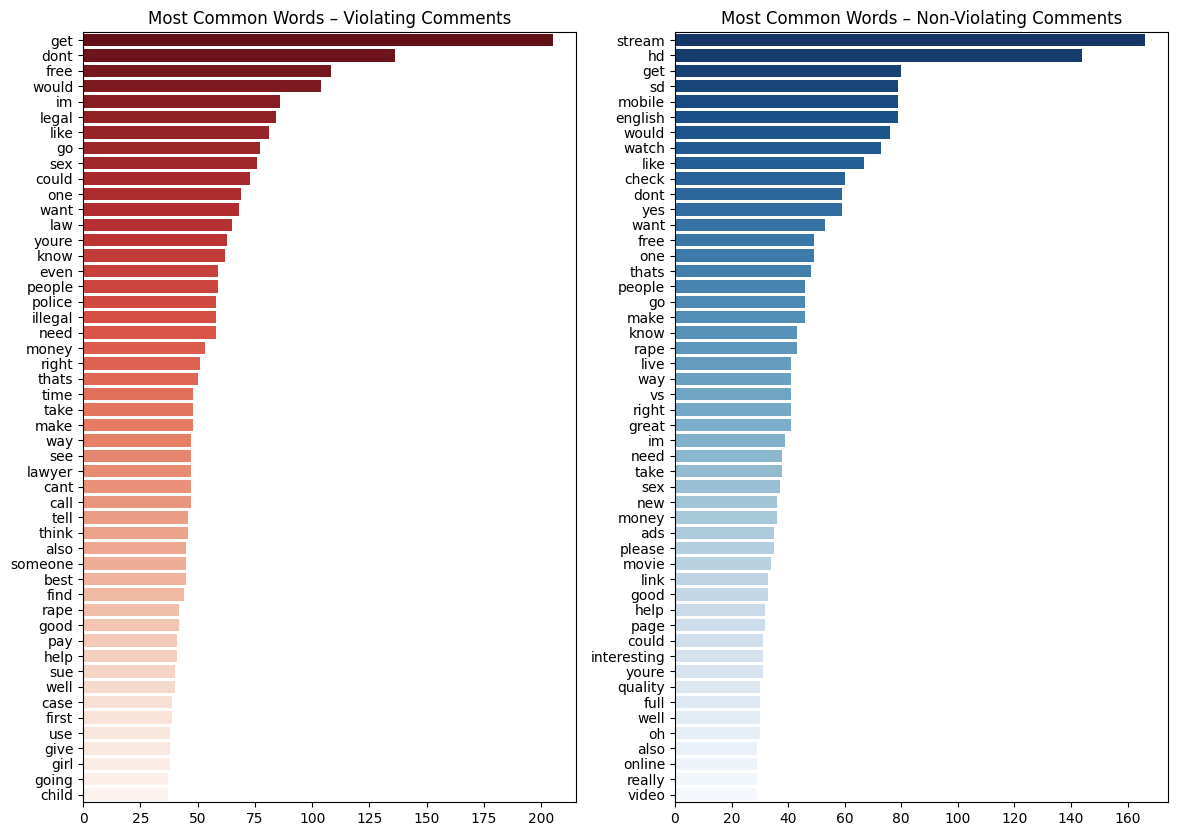

In [94]:

plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(x=[count for word, count in violation_words], y=[word for word, count in violation_words], palette='Reds_r')

plt.title("Most Common Words – Violating Comments")

plt.subplot(1,2,2)
sns.barplot(x=[count for word, count in non_violation_words], y=[word for word, count in non_violation_words], palette='Blues_r')
plt.title("Most Common Words – Non-Violating Comments")
plt.show()

In [95]:
subreddit_stats = (
    df.groupby('subreddit')
    .agg(  # Aggregate statistics for each subreddit
        violation_rate=('rule_violation', 'mean'), # Mean violation rate per subreddit
        comment_count=('rule_violation', 'count') # Total comments per subreddit
    )
    .reset_index()  # Reset index to turn 'subreddit' back into a column
)


zip() pairs elements from two lists so we can loop through them together\
enumerate() adds an index counter to each pair.\
Example:\
rates = [0.6, 0.5]\
counts = [100, 200]\
for i, (rate, count) in enumerate(zip(rates, counts)):\
    print(i, rate, count)\
Output:\
0 0.6 100\
1 0.5 200\


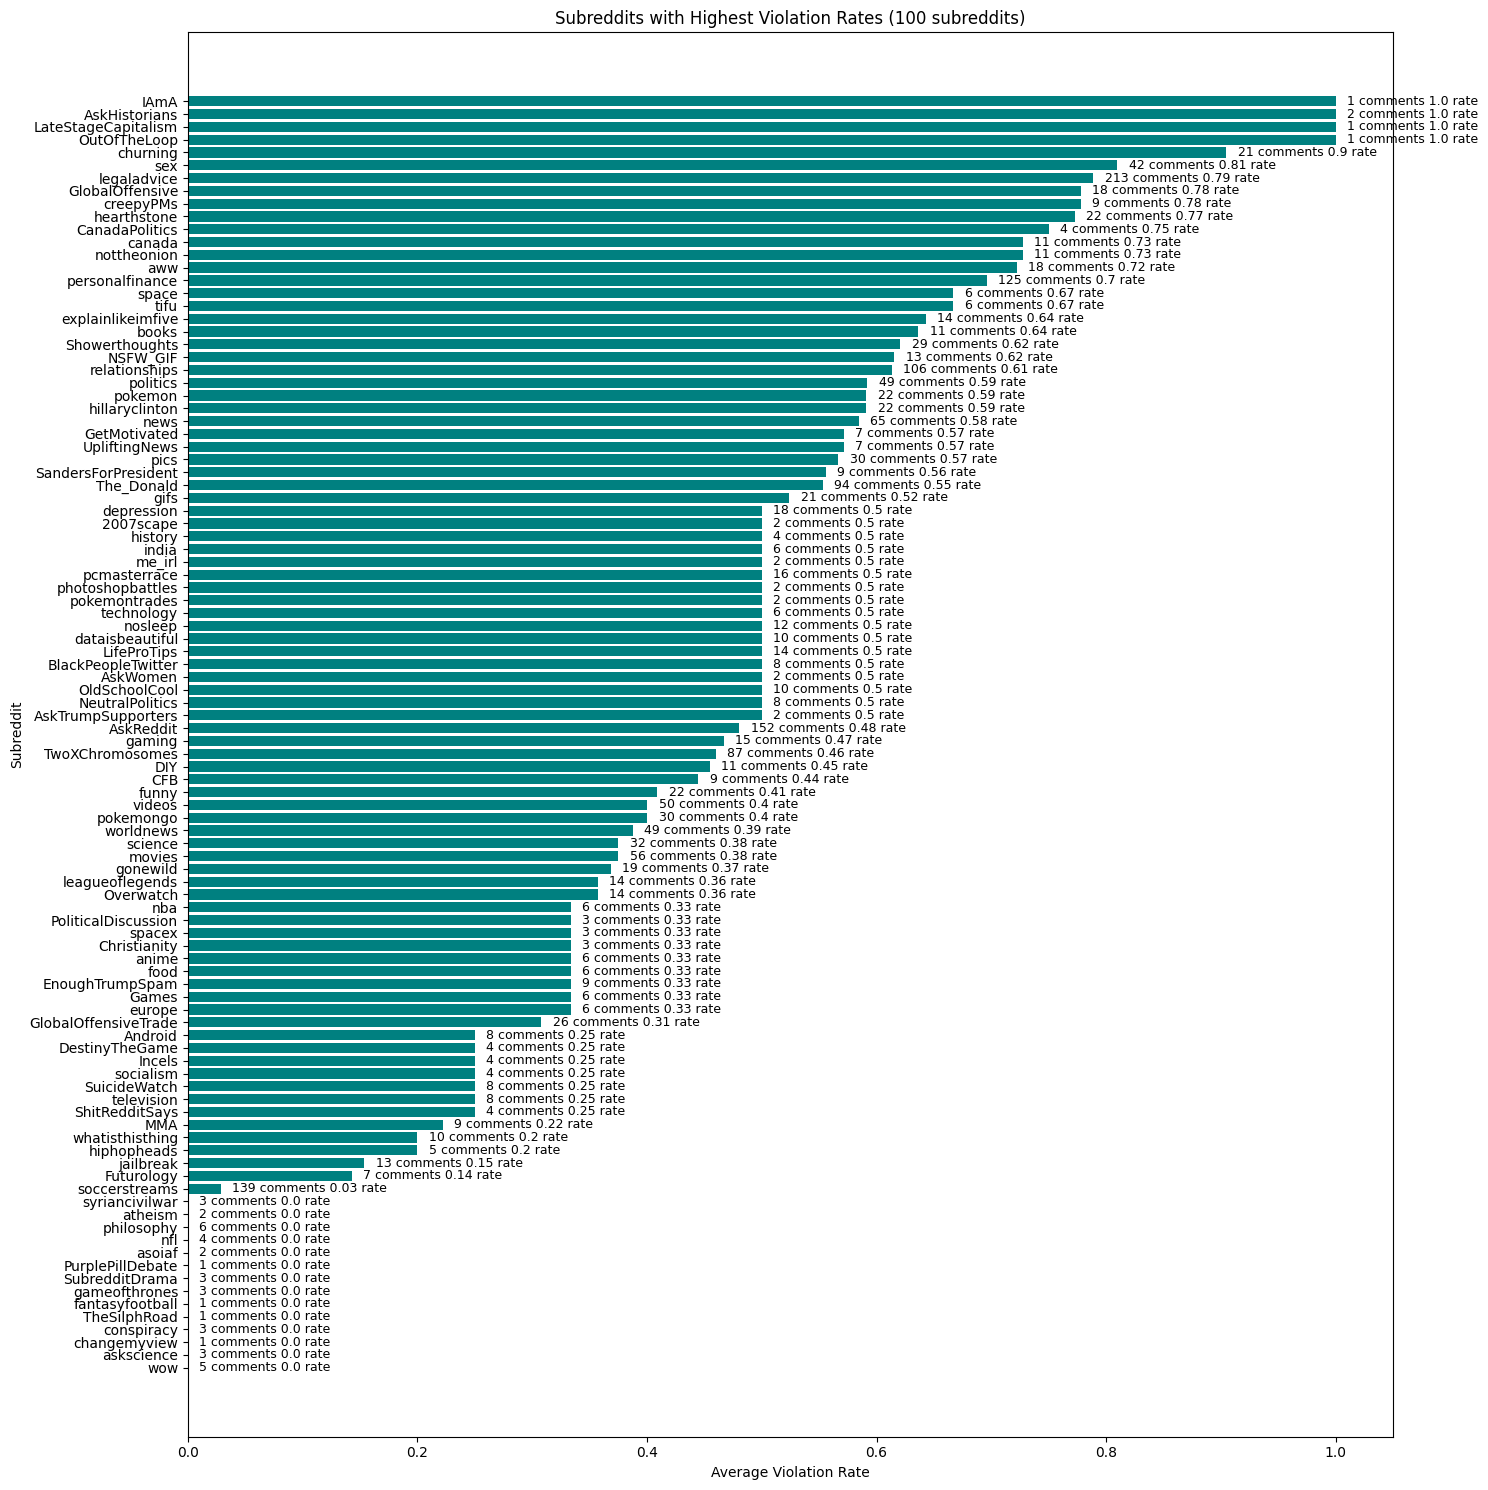

In [96]:
top = subreddit_stats.sort_values(by=['violation_rate'], ascending=[False])

# Horizontal bar plot
plt.figure(figsize=(15, 15))
plt.barh(top['subreddit'], top['violation_rate'], color='teal') # plt.barh(y, x, color='teal')
plt.xlabel("Average Violation Rate")
plt.ylabel("Subreddit")
plt.title(f"Subreddits with Highest Violation Rates ({len(top)} subreddits)")

# Show comment count next to bars
for i, (rate, count) in enumerate(zip(top['violation_rate'], top['comment_count'])): 
    plt.text(rate + 0.01, i, f"{count} comments {round(rate, 2)} rate" , va='center', fontsize=9) # plt.text is the index, rate + 0.01 is x position to place text slightly right of bar, i is y position, f string to format text 

plt.gca().invert_yaxis()  # gca gets the current axis to invert y axis so that highest rate is on top; invert_yaxis() inverts the y axis
plt.tight_layout() # Adjust layout to prevent clipping
plt.show()

In [17]:
df['avg_word_length'] = df['body_length'] / (df['word_count'] + 1)

# URL and link features
df['has_url'] = df['body'].str.contains(r'http|www\.', regex=True).astype(int)
df['url_count'] = df['body'].str.count(r'http\S+|www\.\S+')

# Punctuation features
df['exclamation_count'] = df['body'].str.count('!')
df['question_count'] = df['body'].str.count('\?')
df['caps_ratio'] = df['body'].apply(
    lambda x: sum(1 for c in x if c.isupper()) / (len(x) + 1) # Calculate ratio of uppercase letters to total characters
)

# Sentence features
df['sentence_count'] = df['body'].str.count('[.!?]') + 1

<>:9: SyntaxWarning: invalid escape sequence '\?'
<>:9: SyntaxWarning: invalid escape sequence '\?'
C:\Users\PC-PHONE\AppData\Local\Temp\ipykernel_13544\3657283797.py:9: SyntaxWarning: invalid escape sequence '\?'
  df['question_count'] = df['body'].str.count('\?')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   row_id              10 non-null     int64  
 1   body                10 non-null     object 
 2   rule                10 non-null     object 
 3   subreddit           10 non-null     object 
 4   positive_example_1  10 non-null     object 
 5   positive_example_2  10 non-null     object 
 6   negative_example_1  10 non-null     object 
 7   negative_example_2  10 non-null     object 
 8   body_length         10 non-null     int64  
 9   word_count          10 non-null     int64  
 10  clean_body          10 non-null     object 
 11  avg_word_length     10 non-null     float64
 12  has_url             10 non-null     int32  
 13  url_count           10 non-null     int64  
 14  exclamation_count   10 non-null     int64  
 15  question_count      10 non-null     int64  
 16  caps_ratio 

In [19]:
df.head(4)

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,body_length,word_count,clean_body,avg_word_length,has_url,url_count,exclamation_count,question_count,caps_ratio,sentence_count
0,2029,NEW RAP GROUP 17. CHECK US OUT https://soundcl...,"No Advertising: Spam, referral links, unsolici...",hiphopheads,"Hey, guys, just wanted to drop in and invite y...",Cum Swallowing Hottie Katrina Kaif Cartoon Xvi...,SD Stream Eng - [Chelsea TV USA](http://soccer...,HD Streams: |[ENG HD Stoke vs Manchester Unite...,68,8,new rap group check us,7.555556,1,1,0,0,0.304348,3
1,2030,Make your life comfortable. Get up to 15% Disc...,No legal advice: Do not offer or request legal...,AskReddit,Get a lawyer and get the security camera foota...,That isn't drastic. You tried reaching out to ...,So what are you going to do with the insurance...,It's just for Austria & Germany. If you still ...,409,46,make life comfortable get discount pain killer...,8.702128,1,2,0,0,0.063415,7
2,2031,Kickin' ass and selling underwear!\nJust made ...,"No Advertising: Spam, referral links, unsolici...",gonewild,Good story my friend. Check out my blog at ht...,If you know what exactly you need then you don...,CENTIPEDES\n\nSOME BASED PATRIOTS HAVE CREATED...,[So great! Thanks for sharing.](http://www.che...,196,29,kickin ass selling underwear made account last...,6.533333,1,1,1,0,0.020305,5
3,2032,watch hooters best therein http://clickan...,"No Advertising: Spam, referral links, unsolici...",personalfinance,"Earn 50,000 bonus points with Chase Sapphire P...","Cool, front page! I made this print along with...",[Full HD Movie Online Free](http://www.flickma...,* Karambit Black Pearl\n* 0.02137822 Float (un...,56,5,watch hooters best therein,9.333333,1,1,0,0,0.000000,2


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [22]:
df.to_csv("C:/Users/PC-PHONE/Documents/python/kaggle-Competition/test_preprocessed.csv", index=False)

In [101]:
le_rule = LabelEncoder()
df['rule_encoded'] = le_rule.fit_transform(df['rule'])

# Get rule dummies for modeling
rule_dummies = pd.get_dummies(df['rule'], prefix='rule')

# LabelEncoder : turns categories into numbers (1 column).

# get_dummies : turns categories into separate columns (one per rule).

In [102]:
df['positive_example_1_clean']=clean_text(df['positive_example_1'])
df['positive_example_2_clean']=clean_text(df['positive_example_2'])
df['negative_example_1_clean']=clean_text(df['negative_example_1'])
df['negative_example_2_clean']=clean_text(df['negative_example_2'])


In [103]:

# Initialize vectorizer
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

# Fit on all text
all_text = pd.concat([
    df['clean_body'],
    df['positive_example_1_clean'],
    df['positive_example_2_clean'],
    df['negative_example_1_clean'],
    df['negative_example_2_clean']
]).fillna('')

tfidf.fit(all_text)

# Transform
body_vec = tfidf.transform(df['clean_body'].fillna(''))
pos1_vec = tfidf.transform(df['positive_example_1_clean'])
pos2_vec = tfidf.transform(df['positive_example_2_clean'])
neg1_vec = tfidf.transform(df['negative_example_1_clean'])
neg2_vec = tfidf.transform(df['negative_example_2_clean'])

# Calculate similarities
from sklearn.metrics.pairwise import cosine_similarity

df['sim_pos1'] = [cosine_similarity(body_vec[i], pos1_vec[i])[0, 0] 
                  for i in range(len(df))]
df['sim_pos2'] = [cosine_similarity(body_vec[i], pos2_vec[i])[0, 0] 
                  for i in range(len(df))]
df['sim_neg1'] = [cosine_similarity(body_vec[i], neg1_vec[i])[0, 0] 
                  for i in range(len(df))]
df['sim_neg2'] = [cosine_similarity(body_vec[i], neg2_vec[i])[0, 0] 
                  for i in range(len(df))]

# Aggregate similarities
df['max_sim_positive'] = df[['sim_pos1', 'sim_pos2']].max(axis=1)
df['max_sim_negative'] = df[['sim_neg1', 'sim_neg2']].max(axis=1)
df['avg_sim_positive'] = df[['sim_pos1', 'sim_pos2']].mean(axis=1)
df['avg_sim_negative'] = df[['sim_neg1', 'sim_neg2']].mean(axis=1)

# KEY FEATURE: Similarity difference
df['sim_diff'] = df['max_sim_positive'] - df['max_sim_negative']

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   row_id                    2029 non-null   int64  
 1   body                      2029 non-null   object 
 2   rule                      2029 non-null   object 
 3   subreddit                 2029 non-null   object 
 4   positive_example_1        2029 non-null   object 
 5   positive_example_2        2029 non-null   object 
 6   negative_example_1        2029 non-null   object 
 7   negative_example_2        2029 non-null   object 
 8   rule_violation            2029 non-null   int64  
 9   body_length               2029 non-null   int64  
 10  word_count                2029 non-null   int64  
 11  clean_body                2029 non-null   object 
 12  avg_word_length           2029 non-null   float64
 13  has_url                   2029 non-null   int32  
 14  url_coun

# # preprocessing Test set